# Algebraic and Differential Equations

This lecture covers the basic ideas behind numerical methods for solving algebraic equations and ordinary differential equations. For more detail on these concepts and how they are implemented in Python, please reference **Supplements 09 - 14**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Numerical Methods

Your mathematics and introductory engineering courses have given you a lot of problems that you were able to solve by hand (i.e., analytically) to obtain closed-form solutions using pencil-and-paper and, at most, a calculator. This is not generally the case in engineering practice, especially in reactor design.

We frequently have to solve equations or sets of equations that have no tractable analytical solution. These are usually, at best, extremely tedious to solve by hand and, at worst, impossible to solve by hand. In these cases, we have to rely on numerical methods, which provide an approximation of the true solution. We will use numerical methods extensively in this course. so we will introduce a few of the key tools for solving various types of equations in this notebook, and then we'll get a lot of practice with them for the rest of the semester. We first cover the basics of solving **algebraic equations** using numerical methods, and then we cover analogous solution of **ordinary differential equations (ODEs)**, specifically, initial value problems.  Any special cases outside of these two, we will cover in the course of specific examples as the semester progresses.

### Algebraic Equations

Let's imagine we have an algebraic equation that we want to solve.  In this case, we'll consider a simple function:

$$f(x) = x^2 - 10x - 25$$

And we want to find the root of that function, i.e., where it is equal to zero.  So, with root finding, we are trying to solve for the value of x that satisfies the equation below:

$$0 = x^2 - 10x - 25$$

This is pretty easy to solve--that is intentional. When you first test out numerical methods (which give approximate solutions), it is very helpful to know the correct answer so that you can make sure your numerical methods are working properly. In this case, I would just use the quadratic formula if I needed an exact solution:  

$$ x = -b \pm \frac{\sqrt{\left(b^2 - 4ac\right)}}{2a}$$


If we do that, we find that there are two solutions to this equation (two roots of the function):

\begin{align*}
    x &= 12.07107 \\
    x &= -2.07107
\end{align*}

But what if we had no idea how to solve the problem?  There are a number of things we might try.  I always like graphing the function -- for univariate problems, this is both easy and useful.

#### Graphical root finding

In the cell below, we plot the function of interest on a domain (set of x values) from -20 to 20. Roots are where the function crosses the x-axis (where y = 0), From this, we can plainly see there is one root near $x = -2$, and there is another root near $x = 12$. This is consistent with our quadratic formula solution. Graphing isn't the most precise method, but it allows us to very quickly identify the rough location of roots and solutions to various functions, so it is extremely useful.

Beyond this, we generally have to rely on iterative methods, where we guess a likely solution, check the answer to see how close we are to the desired value, and then change our guess, hopefully moving toward the solution as we change our guesses.

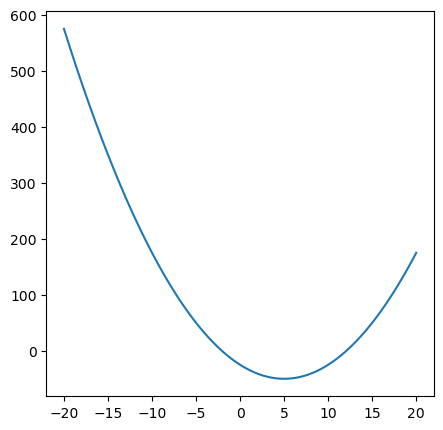

In [2]:
f = lambda x: x**2 - 10*x - 25
xplot = np.linspace(-20, 20, 100)
plt.figure(figsize = (5, 5))
plt.plot(xplot, f(xplot))

#Add formatting to figure to suit your specific needs and make a more informative figure.
# plt.xlim(-20, 20)  #limits on x axis
# plt.xticks(np.arange(-20, 21, 5)) #set x-ticks manually
# plt.xlabel('x', fontsize = 14) #add x axis label at font size of 14 pt
# plt.ylim(-100, 100) #set limits on y axis
# plt.yticks(np.linspace(-100, 100, 11)) #set tickmarks on y axis
# plt.ylabel('f(x)', fontsize = 14) #add lable on y axis at 14 pt font
# plt.hlines(0, -20, 20, ls = 'dashed', color = 'black', lw = 1.0) #horizontal line at y =0
# plt.vlines(-2.07107, -100, 100, ls = 'dotted', color = 'red', lw = 0.75) #vertical line at root 1
# plt.vlines(12.07107, -100, 100, ls = 'dotted', color = 'red', lw = 0.75) #vertical line at root 2
# plt.show() #display current figure

#### Guess and Check: a brute force numerical method

The most basic example is an iterative guess-and-check strategy.  We literally make a guess and keep changing it until we get close enough to our solution.  "Close enough" is the tolerance on our problem solution, and it depends on the level of precision we need in a particular problem.

This is implemented in the cell below, where we just repeatedly pass values of x to our function f(x) until it returns a value that is sufficiently close to zero for our satisfaction...

In [3]:
print(f(-10))    #gives 175
# print(f(10))     #gives -25.  There is at least one root between -10 and 10 since I crossed the x-axis.
# print(f(-5))     #gives 50....There is at least one root between 10 and -5 sice I crossed x again
# print(f(-7))     #gives 94....that move was away from the root
# print(f(-3))     #gives 14....relative to -5, that moves me toward the root
# print(f(-1))     #gives -14...the root is somewhere between -1 and -3
# print(f(-2))     #gives -1...close, but not quite there
# print(f(-2.5))   #gives 6.25...too far
# print(f(-2.1))   #gives 0.4...root must be between -2 and -2.1
# print(f(-2.05))  #gives -.29...root is between -2.05 and -2.1
# print(f(-2.075)) #gives 0.0556...root must be between -2.05 and -2.075
# print(f(-2.07))  #gives -0.015...close enough.

175


So, you can see that guess and check is a pretty inefficient way to do this.  It requires me to inspect each solution and make decisions about my next guess.  Although I can probably get this to work for a simple univarate funtion like f(x) above, it is almost impossible to use guess and check to solve a system of nonlinear equations numerically.  In these cases, we'll use formal numerical algorithms to solve algebraic equations.  There are numerous options, many of which are already built into Python, Matlab, Excel, etc.

#### Newton-Raphson method

As an example, we'll implement a Newton-Raphson iteration to solve this problem.  The Newton-Raphson iteration is much better than what we did above because it uses information about both the function value and its derivative to update guesses automatically.  The formula for the Newton-Raphson iteration is this:

$$x_{i+1} = x_i - \frac{f(x_i)}{f^\prime(x_i)}$$

We make an initial guess, $x_i$, then we update that guess by subtracting the ratio of the function value at $x_i$, $f(x_i)$, to its derivative at $x_i$, $f^\prime(x_i)$. We run this iteratively in the cell below. The commented code shows the first iteration, then the process is automated using a while loop. Essentially, the while loop accomplishes the same thing as clicking and dragging to autofill in Excel. You can see how quickly it converges for this simple example.  This is much, much better than a simple guess and check strategy.

In [4]:
f  = lambda x: x**2 - 10*x - 25
df = lambda x: 2*x - 10

# # manual illustration of the first iteration
# x = -10
# print(x, f(x), df(x))
# x2 = x - f(x)/df(x)
# print(x, x2, f(x), df(x))

# # run a while loop until the NR iteration converges to within 1e-3 of zero.
# x = -10
# while abs(f(x)) > 1e-3:
#     x = x - f(x)/df(x)
#     print(round(x, 10), round(f(x), 10))
#     time.sleep(3)
# print("\n Loop is finished!")

#### Numerical solution of algebraic equations can be difficult...

Although a Newton-Raphson iteration is very useful, it isn't always guaranteed to converge.  In general, you'll find this is true of algebraic solutions.  They can be flaky, and they are usually very sensitive to the initial guess that we make for the solution.  As the equations become increasingly nonlinear and difficult to solve, we will find we need very good initial guesses in order to get numerical methods to converge for algebraic equations. As an example, let's consider the more difficult function:

$$g(x) = -0.74 + 0.765x + 1.1x^2 - 3.55x^3$$

We'll graph it and then run a Newton-Raphson iteration.

In [5]:
g  = lambda x: -0.74  + 0.765*x + 1.1*x**2 - 3.55*x**3
dg = lambda x: 0.765 + 2.2*x - 3*3.55*x**2

xspan = np.linspace(-1, 1, 100)

# plt.figure(figsize = (5, 5))
# plt.plot(xspan, g(xspan))
# plt.xlim(-1, 1)
# plt.xticks(np.linspace(-1, 1, 9))
# plt.xlabel('x')
# plt.ylim(-4, 4)
# plt.yticks(np.arange(-4, 5, 1))
# plt.ylabel('g(x)')
# plt.hlines(0, -1, 1, ls = 'dashed', color = 'black', lw = 1.0)
# plt.vlines(-0.6081345343, -4, 4, ls = 'dotted', color = 'red', lw = 0.75)
# plt.show()

From the graphical analysis above, we can see that, on this domain, there is one root at about -0.6. Let's try to find it with a Newton-Raphson iteration. We'll start with an initial guess of -0.5 and see what happens...

In [6]:
x = -0.5
y = g(x)

# while abs(y) > 1e-3:
#     y = g(x)
#     x = x - g(x)/dg(x)
#     print(round(x, 10), round(y, 10))

We see it converges to the root easily...now let's try an initial guess of 5/9.

```{danger}
The cell below will result in an infinite loop (see explanation below).  If this happens when running a notebook, you can either press the stop button above ($\blacksquare$), go to Kernel -> Interrupt in the menu, or press <code>I</code> <code>I</code> in the cell that is stuck in the loop.
```



In [7]:
# x = 5/9
# y = g(x)

# while abs(y) > 1e-3:
#     y = g(x)
#     x = x - g(x)/dg(x)
#     print(round(x, 10), round(y, 10))

This simple change--picking a bad initial guess for a difficult to solve equation--causes us to wind up in an infinite loop! The point of this illustration is that when you're solving algebraic equations with numerical methods, beware that they will generally be very sensitive to the initial guess that you make.

#### Better tools are available in Python

In general, we should just use the numerical methods packages that are available in whatever software we're using as opposed to writing iteration scripts ourselves. Under the hood, it's basically the same thing, the built in tools are generally more robust against issues like the one we encountered above. If you're using Python, the appropriate tools are found in the `optimize` module from the Scipy Package. See **Supplement 09** for details about how to use it. `scipy.optimize` is also covered extensively in Recitation 02. 

In the cell below, we illustrate how `scipy.opimize` works in practice. First, we import `optimize` and we alias it as `opt` just to make the syntax a little shorter and cleaner. Inside of `scipy.optimize` or "opt" as we will call it hereafter, there are many solvers available.  These include the classic Newton-Raphson algorithm, among many others. As an example, we can use `opt.newton()`to find the root of the above function.  The syntax is really straightforward.  All we need to do is pass the function handle (it's name) and an initial guess at the solution.  `opt.newton()` will handle the rest.

```{note}
Despite the name, `opt.newton` actually uses a secant method by default.
```

In [8]:
from scipy import optimize as opt

# print(opt.newton(f, -10))
# print(opt.newton(g, -2))

#### Numerical Methods for Systems of Equations

More generally, we need to be able to solve systems of algebraic equations that are functions of multiple variables, e.g.:

\begin{align*}
    0 &= x^2 - 10x - 25y + 17 \\
    0 &= y^2  - 36x
\end{align*}

When we have nonlinear systems like this, we almost always will solve them numerically. To do this, we just extend the above methodology for solving single, univariate functions with `opt.newton()` to solving multivariate vector functions with `opt.root()`.  For a more detailed discussion of vector functions and `opt.root()`, see Supplement 12. The methods are also covered in Recitation 02.

In [9]:
# def eqns(var):
#     x = var[0]
#     y = var[1]
#     eq1 = x**2 - 10*x -25*y + 17
#     eq2 = y**2 - 36*x
#     return [eq1, eq2]

# sol = opt.root(eqns, [0,0])
# print(sol.x)

### Ordinary Differential Equations (initial value problems):

#### A first order problem

We next think about how one might solve an initial value problem in cases where it isn't clear how to integrate the differential equation by hand.  We demonstrate the methods by considering a simple initial value problem:

$$\frac{dx}{dt} = -x$$

Where $x = 10$ at $t = 0$.

#### The analytical solution

We would like to know the value of $x$ at $t = 4$.  In this case, it is a first order ODE, and we can easily separate variables and integrate by hand:

$$\int_{x_0}^x\frac{1}{x^\prime} dx^\prime = - \int_0^t dt^\prime$$

The integral on the left is a natural logarithm, so the solution of a first order problem like this is always an exponential function of the independent variable (time in this case):

$$x(t) = x_0\exp(-t)$$

Based on that solution, we can create a function and plot it to show the ***exact*** behavior of x as a function of t.  Then, we'll try to ***approximate*** that behavior using a numerical integration of that initial value problem.

In [10]:
def xtrue(t):
    return x0*np.exp(-t)

x0 = 10
tspan = np.linspace(0, 4, 100)

# plt.figure(1, figsize = (5, 5))
# plt.plot(tspan, xtrue(tspan), color = 'blue', label = 'Analytical Solution')
# plt.xlim(0, 4)
# plt.xlabel('t', fontsize = 12, fontfamily = 'Arial')
# plt.ylim(0, 10)
# plt.ylabel('x', fontsize = 12, fontfamily = 'Arial')
# plt.legend()
# plt.show()

Now that our function x(t) is defined, we can easily use it to evaluate x at t = 4; we find that it is equal to 0.183

In [11]:
xtrue(4)
# print(f'At t = 4, the value of x is {xtrue(4)}') #formatted string; evaluates code in {}
#print(f'At t = 4, the value of x is {xtrue(4):6.5f}') #formatted string; evaluates code in {}

0.1831563888873418

#### The Euler Method

Now we'll consider the case where we don't actually know the analytical solution, and we need to approximate it using a numerical method.  In this case, we'll use an Euler step, but the general concept here is the same as that used in more advanced methods:  we use information about the derivative of a function at the current value of that function to estimate where the function will be at some point in the future (a future time or a future position).

This is based on the idea that the derivative of a function tells us the change in dependent variable that occurs when we change the dependent variable, i.e., for this function:

$$\frac{dx}{dt} = m$$

Where m is the slope of the function x(t) at a given point in time.  We don't know what the function is, but we do know what its derivative is:

$$\frac{dx}{dt} = -x$$

We can **approximate** a derivative using discrete (i.e., non-differential) changes in x and t, similar to what we did when we first learned about a slope as "rise over run".

$$m \approx \frac{\Delta x}{\Delta t}$$

We can discretize that to describe the change in x and t in terms of their current state (position $i$) and their state at one step in the future (position $i+1$):

$$m_i = \frac{(x_{i+1} - x_i)}{(t_{i+1} - t_i)}$$

In other words, if we know the slope, we can make a small step in the independent variable ($\Delta t = t_{i+1} - t_i$) and estimate where the dependent variable ends up after we make the step:

$$x_{i+1} = x_i + \frac{dx}{dt}\Delta t$$

or:

$$x_{i+1} = x_i + m_i\Delta t$$

In this specific example, we know that $\frac{dx}{dt} = m = -x$, so:

$$x_{i+1} = x_i - x_i\Delta t$$

For consistency with the Runge-Kutta notation I use below, I'm going to call that time step "h", giving the following equation for an Euler method:

$$x_{i+1} = x_i - hx_i$$



That is all we need to write an iterative loop to solve this using a numerical method to approximate x(t).  This is implemented with for loop below, which I do by specifying the number of steps the solver will take and integrating to a time of 4 units, no matter how many steps I've made.  That is, I adjust the step size in response to the number of steps I want to take.  As I take more steps, the step size gets smaller. We'll start with 5 steps for illustration purposes and go from there. We start the iteration at the start of our initial value problem, i.e., at t = 0, x = 10...and we'll step forward in time until we reach t = 4.  We'll plot the result to see how well it compares with the true solution.

In [12]:
nsteps = 5
tmax   = 4
h      = tmax/nsteps

# # A manual illustration of the first iteration
# print(h)
# t  = 0
# x  = 10
# xnew = x - h*x
# tnew = t + h
# print(t, x)
# print(tnew, xnew)

# t  = np.array([0.00]) #Initialize time series at zero
# x  = np.array([10.00]) #Initialize x series at time = 0

# #We'll append updated values to t and x on each pass through the loop

# for i in range(0, nsteps):
#     xnew = x[i] - h*x[i]
#     tnew = t[i] + h
#     x = np.append(x, xnew)
#     t = np.append(t, tnew)

# print(f'At t = 4 with {nsteps} steps and a step size of {h:9.8f}:\n the Euler method predits that x = {x[-1]:6.5f)}, and the true value is {xtrue(4):6.5f}')    

# plt.figure(1, figsize = (5, 5))
# plt.scatter(t, x, marker = 's', color = 'red', label = 'Euler Step')
# plt.plot(tspan, xtrue(tspan), color = 'blue', label = 'Analytical Solution')
# plt.xlim(0, 4)
# plt.ylim(0, 10)
# plt.xlabel('t', fontsize = 12)
# plt.ylabel('x', fontsize = 12)
# plt.legend()
# plt.show()

#### Problems with the Euler Method

You can see that Euler does a pretty bad job here; that is because we are making large steps and assuming that the derivative value doesn't change over the span of that step, which clearly isn't true when you consider that m = -x:  as x changes, the slope has to change.  So this is a really rough approximation, and we wont' see good agreement unless we take a lot of steps (see below).  Feel free to progressively adjust the step size to get a feel for how many steps (and how small each step needs to be) to get even reasonable accuracy with an Euler method.

In [13]:
nsteps = 20
tmax   = 4
h      = tmax/nsteps
t  = np.array([0.00])  #initialize array of times.
x  = np.array([10.00]) #Likewise, I want to store all values of x for plotting.

#We'll append updated values to t and x on each pass through the loop

# for i in range(0, nsteps):
#     xnew = x[i] - h*x[i]
#     tnew = t[i] + h
#     x = np.append(x, xnew)
#     t = np.append(t, tnew)

# print(f'At t = 4 with {nsteps} steps and a step size of {h:9.8f}:\n the Euler method predits that x = {x[-1]:6.5f}, and the true value is {xtrue(4):6.5f}')    
# plt.figure(1, figsize = (5, 5))
# plt.scatter(t, x, marker = 's', color = 'red', label = 'Euler Step')
# plt.plot(tspan, xtrue(tspan), color = 'blue', label = 'Analytical Solution')
# plt.xlim(0, 4)
# plt.ylim(0, 10)
# plt.xlabel('t', fontsize = 12)
# plt.ylabel('x', fontsize = 12)
# plt.legend()
# plt.show()
 

#### Higher Order Methods (Runge-Kutta)

There are far more accurate methods for numerical integration.  Many, many methods, actually.  We'll usually be able to use the classic 4th order Runge Kutta method in this class.  Occasionally, we may run into a stiff ODE system that will require us to use a stiff solver, but we'll cross that bridge when we come to it.

An explict 4th order Runge Kutta method is a fancy adaptation of the Euler method that is able to better anticipate how the derivative of the function will change across the span of the step.  This makes it much, much more accurate, and we'll find that we can get almost analytical precision with only a few steps.  It looks much more complicated, but the principle is the same.  We are using the current value of the function and the derivative function to estimate where the function will be at some point in the future.

If you want to read a little more about the 4th order Runge-Kutta method, it's worth a quick look at least at Wikipedia, though you can get a more thorough treatment in a numerical methods book.

https://en.wikipedia.org/wiki/Runge-Kutta_methods

If you skim that page, you'll see the equations I used to develop the iteration scheme in the cell below.

In [14]:
nsteps = 5
tmax   = 4
h      = tmax/nsteps
xRK    = np.array([10.0]) #RK values
tRK    = np.array([0.0])  #RK values
t      = np.array([0.00]) #Euler values
x      = np.array([10.00]) #Euler values

# #Euler method
# for i in range(0, nsteps):
#     xnew = x[i] - h*x[i]
#     tnew = t[i] + h
#     x = np.append(x, xnew)
#     t = np.append(t, tnew)

# #RK Method
# for i in range(0, nsteps):
#     dxdt   = -xRK[i] #compute derivative, dx/dt @ x[i], t[i]
#     k1     =  dxdt    #RK parameter "k1[i]" is equal to derivative "dxdt[i] 
#     k2     = -(xRK[i] + h/2*k1) #RK parameter "k2[i]" is a more complex function of both x and dxdt
#     k3     = -(xRK[i] + h/2*k2) #RK parameter "k3[i]" is a more complex function of both x and dxdt
#     k4     = -(xRK[i] + h*k3);  #RK parameter "k4[i]" is a more complex function of both x and dxdt
#     xRKnew = xRK[i] + 1/6*h*(k1 + 2*k2 + 2*k3 + k4)
#     tRKnew = tRK[i] + h
#     xRK    = np.append(xRK, xRKnew) #RK parameters k1 to k4 are used to predict change in x over time step h.  This equation gives the value of x[i+1].
#     tRK    = np.append(tRK, tRKnew) #This steps the time forward to t[i+1].

# print(f'At t = 4 with {nsteps} steps and a step size of {h:9.8f}:\n the RK method predicts that x = {xRK[-1]:6.5f}, and the true value is {xtrue(4):6.5f}')    
# plt.figure(1, figsize = (5, 5))
# plt.scatter(t, x, marker = 's', color = 'red', label = 'Euler Step', clip_on = False)
# plt.scatter(tRK, xRK, label = 'Runge Kutta', marker = 'o', color = 'black', clip_on = False)
# plt.plot(tspan, xtrue(tspan), color = 'blue', label = 'Analytical Solution')
# plt.xlim(0, 4)
# plt.ylim(0, 10)
# plt.xlabel('t', fontsize = 12)
# plt.ylabel('x', fontsize = 12)
# plt.legend()
# plt.show()

#### ODE Solvers in Python

As with the Algebraic methods above, we really don't want to write our own integration algorithms.  There is much better support already built into Python, Matlab, etc.  The numerical methods packages for ODE solutions are also in the `scipy` package, specifically in `scipy.solve_ivp()`. This tool is relatively easy to use, we just write a function that calculates our derivative, give it initial values and an integration span, and it does the rest for us. The basic approach is given in the cell below.

```{tip}
Numerical solution of initial value problems is covered in detail in Recitation 05 as well as in Python Supplement 14
```

In [15]:
# from scipy.integrate import solve_ivp as ivp

# def D(t,x):  #function of form f(independent variable, dependent variable)
#     return -x #this is just calculating my derivative and returning it.

# sol = ivp(D, (0, 4), [10])
# print(f'At t = 4:\n default scipy.integrate.solve_ivp predits that x = {sol.y[0, -1]:6.5f}, and the true value is {xtrue(4):6.5f}')    

# plt.figure(1, figsize = (5, 5))
# plt.scatter(t, x, marker = 's', color = 'red', label = 'Euler Step', clip_on = False)
# plt.scatter(tRK, xRK, label = 'Runge Kutta', marker = 'o', color = 'black', clip_on = False)
# plt.plot(tspan, xtrue(tspan), color = 'blue', label = 'Analytical Solution')
# plt.scatter(sol.t, sol.y[0,:], label = 'Scipy', marker = 'o', color = 'blue', clip_on = False)
# plt.xlim(0, 4)
# plt.ylim(0, 10)
# plt.xlabel('t', fontsize = 12)
# plt.ylabel('x', fontsize = 12)
# plt.legend()
# plt.show()